In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,mean_squared_error


<Axes: xlabel='date'>

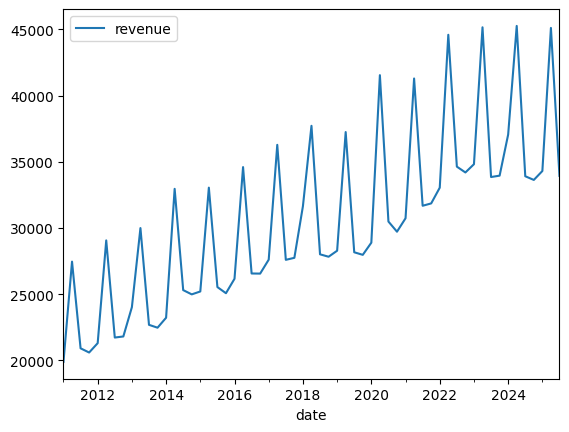

In [14]:
df1=pd.read_excel('data/kroger.xlsx')
df1.head()
df1=df1.set_index('date')
df1.index=pd.to_datetime(df1.index)
df1['revenue']=df1['revenue'].str.replace(',','').str.replace('$',"").astype(float)
df1.plot()

In [15]:
df1['month']=df1.index.month
df1['year']=df1.index.year
features=['month','year']
target='revenue'

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df1[features], df1['revenue'], test_size=0.2, random_state=42)
model = xgb.XGBRegressor(early_stopping_rounds=10, n_estimators=1000)
model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=True)
y_pred = model.predict(X_test)


[0]	validation_0-rmse:5895.90003
[1]	validation_0-rmse:5007.57716
[2]	validation_0-rmse:4533.48742
[3]	validation_0-rmse:4361.41740
[4]	validation_0-rmse:4309.48157
[5]	validation_0-rmse:4140.93101
[6]	validation_0-rmse:3991.74085
[7]	validation_0-rmse:3911.02162
[8]	validation_0-rmse:3864.98475
[9]	validation_0-rmse:3790.21211
[10]	validation_0-rmse:3705.06895
[11]	validation_0-rmse:3676.60658
[12]	validation_0-rmse:3606.03129
[13]	validation_0-rmse:3593.53933
[14]	validation_0-rmse:3555.03997
[15]	validation_0-rmse:3523.83080
[16]	validation_0-rmse:3530.40865
[17]	validation_0-rmse:3535.49241
[18]	validation_0-rmse:3537.73828
[19]	validation_0-rmse:3538.58521
[20]	validation_0-rmse:3537.15204
[21]	validation_0-rmse:3526.75106
[22]	validation_0-rmse:3526.79334
[23]	validation_0-rmse:3519.05943
[24]	validation_0-rmse:3518.44338
[25]	validation_0-rmse:3512.25700
[26]	validation_0-rmse:3512.20355
[27]	validation_0-rmse:3507.90723
[28]	validation_0-rmse:3504.26610
[29]	validation_0-rmse:3

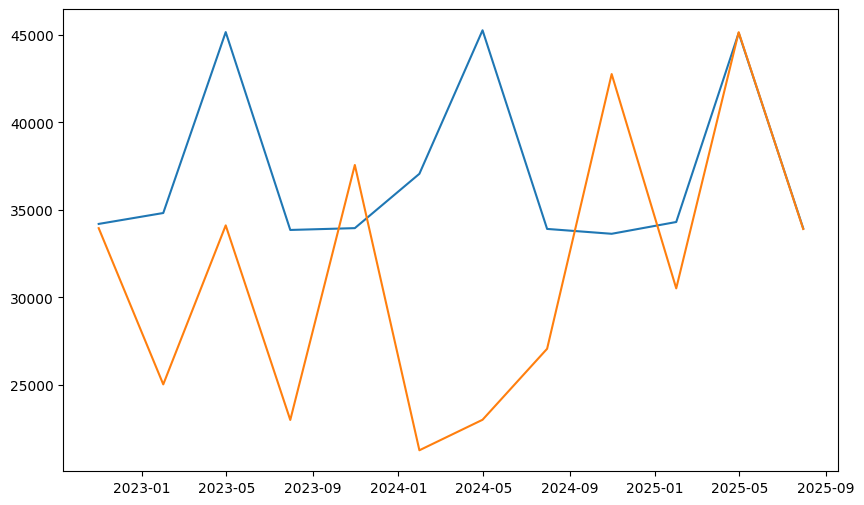

In [17]:
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df1.index[:12], df1['revenue'][:12], label='Actual')
ax.plot(df1.index[:12],y_pred, label='Predicted')

In [18]:
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12279880.918413162


BASE MODEL: Mean Squared Error: 12279880.918413162

In [23]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators':[8,16,32,64,128,256],
                    'max_depth':[2,3,4,5,6],
                    'subsample':[.5,.7,.8,.9,1]
                }
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(early_stopping_rounds=10, n_estimators=1000),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=tscv,
                           verbose=1)
grid_search.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=False)
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 256, 'subsample': 0.5}


In [24]:
model.set_params(**grid_search.best_params_)
model.fit(X_train, y_train, eval_set=[( X_test, y_test)], verbose=True)
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error after tuning: {mse}')

[0]	validation_0-rmse:7143.06260
[1]	validation_0-rmse:6978.76637
[2]	validation_0-rmse:6851.87567
[3]	validation_0-rmse:6738.76637
[4]	validation_0-rmse:6626.05059
[5]	validation_0-rmse:6503.91358
[6]	validation_0-rmse:6306.26697
[7]	validation_0-rmse:6198.56019
[8]	validation_0-rmse:6112.90677
[9]	validation_0-rmse:5919.49246
[10]	validation_0-rmse:5850.56872
[11]	validation_0-rmse:5844.36902
[12]	validation_0-rmse:5621.03868
[13]	validation_0-rmse:5546.64930
[14]	validation_0-rmse:5364.59888
[15]	validation_0-rmse:5322.67190
[16]	validation_0-rmse:5239.84271
[17]	validation_0-rmse:5194.30696
[18]	validation_0-rmse:5155.58630
[19]	validation_0-rmse:5059.04477
[20]	validation_0-rmse:5042.23322
[21]	validation_0-rmse:4996.03847
[22]	validation_0-rmse:4929.98959
[23]	validation_0-rmse:4873.49067
[24]	validation_0-rmse:4822.72761
[25]	validation_0-rmse:4799.10527
[26]	validation_0-rmse:4726.44099
[27]	validation_0-rmse:4683.66983
[28]	validation_0-rmse:4591.04753
[29]	validation_0-rmse:4